In [44]:
import re
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# options
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [45]:
# Load original data
df = pd.read_csv(r'data/fifa21_male2.csv',
                dtype={'Hits': 'object'})
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [46]:
# Standardize columns' names and change index
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_').str.replace('&', 'and')
if df.id.is_unique:
    df = df.set_index('id')
df.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_and_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


### Data Cleaning

In [47]:
# Explore nan values
orig_rows = df.shape[0]
nan_cols = [col for col in df.columns if df[col].isna().sum() > 0]
nan_counts = df[nan_cols].isna().sum()
nan_dtypes = df[nan_cols].dtypes
df_nan = pd.concat([nan_counts, nan_dtypes], axis=1)
df_nan.columns = ['nan_count', 'dtype']
df_nan

,nan_count,dtype
club,23,object
position,410,object
club_logo,23,object
joined,58,object
loan_date_end,15326,object
volleys,58,float64
curve,58,float64
agility,58,float64
balance,58,float64
jumping,58,float64


In [48]:
# It seems feasible to drop all categorical NaN values except the ones on loan_date_end. 
# The entire column will be dropped due to the high number of NaN values and probable uselessness for predictions
df = df.drop(['loan_date_end'], axis=1)
nan_cols.remove('loan_date_end')
cat_nan_cols = [col for col in nan_cols if df[col].dtype=='object']  
df = df.dropna(subset=cat_nan_cols)
df.shape

(15692, 105)

In [49]:
# Replace missing numerical data with the simple average of the column.
# A better analysis should at least try to get better values, for example clustering
# the player by their roles (for example vision and positioning attributes are different if player
# is a defender or attacker or goalkeeper)
nan_cols = [col for col in df.columns if df[col].isna().sum() > 0] # new NaN columns after dropping of categorical missing rows
df[nan_cols] = df[nan_cols].fillna(df[nan_cols].mean())
print('Dropping missing values has led to a reduction of rows by {} %'.format(
    round((orig_rows-df.shape[0])/orig_rows, 2)
))

Dropping missing values has led to a reduction of rows by 0.03 %


##### Study the values count for each columns 
##### Interface this knowledge with columns.csv description to understand:
##### 1 - Which column could be dropped beacause is insignificant to the analysis
##### 2 - Which column could be dropped sue to its unicity (not apporting any features)


In [50]:
# Explore value counts of our columns
# Write data to a file for accurate exploration
# A one-line description will also be displayed in order to understand column meaning
df_desc = pd.read_csv('columns.csv', index_col=0)
orig_stdout = sys.stdout
with open('fifa_vc.txt', 'w', encoding='utf-8') as f:
    sys.stdout = f
    for col in df.columns:
        print(df_desc.loc[col].values[0].lstrip())
        print(df[col].value_counts(), end='\n'*3)
    sys.stdout = orig_stdout
    f.close()

#### Standardization of some columns with straightforward methods:

In [51]:
# height --> to SI units (cm)
def to_cm(lst):
    """Converts height from feet, inches to cm"""
    return float(lst[0])*30.48+float(lst[1])*2.54

df.height = df.height.str.findall(r'(\d+)').apply(to_cm).astype('int64')

# weight --> to SI units (kg)
def to_kg(lbs):
    """Converts weight from lbs to kg"""
    lbs = float(lbs.replace('lbs', '')) * 0.453592
    return float(lbs)

df.weight = df.weight.apply(to_kg) # force integer

# value --> to euro
def to_float(value):
    """Converts string value to float number"""
    value = value.replace('€', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    else:
        return float(value)

df.value = df.value.apply(to_float)

# wage --> to euro
df.wage = df.wage.apply(to_float)

#release clause --> to euro
df.release_clause = df.release_clause.apply(to_float)

#hits --> to number
df.hits = df.hits.apply(to_float)

# Handling the star statistics '<star>n' where n is an integer
star_stats = ['w/f', 'sm', 'ir']
for col in star_stats:
    df[col] = df[col].str[0].astype('int64')


#### More complex logic fore certain columns

In [52]:
# Functions for logic on 'contract' columns
def extract_start(contract):
    """Extract start year of contract"""
    if len(contract) == 0:
        return np.nan # no years is found
    elif len(contract) == 2: 
        if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
            return int(contract[0]) # start year is found
        else:
            return int(contract[1]) # only start year is present
    else:
        # lenght=3
        contract = np.array(contract).astype('int64')
        contract = contract[(contract>2000) & (contract < 2023)] # filter out values
        if len(contract) == 2:
            if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
                return int(contract[0]) # start year is found
            else:
                return contract[0]+'_verify3'
        elif len(contract) == 1: # only start year is found
            return int(contract[0])

def extract_end(contract):
    """Extract end year of contract"""
    if len(contract) == 0:
        return np.nan # no years is found
    elif len(contract) == 2: 
        if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
            return int(contract[1]) # end year is found
        else:
            return np.nan # end year is not present
    else:
        # lenght=3
        contract = np.array(contract).astype('int64')
        contract = contract[(contract>2000) & (contract < 2023)] # filter out values
        if len(contract) == 2:
            if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
                return int(contract[1]) # end year is found
            else:
                return contract[1]+'_verify3'
        elif len(contract) == 1: 
            return np.nan # end year is not present

In [53]:
# Logic for contract columns: range years of contract are extracted in following format:
# contract --> contract_start || contract_end
# contract column will then be dropped
df.insert(list(df.columns).index('contract'), 'contract_start', 
            df.contract.str.findall(r'(\d+)').apply(extract_start))
df.insert(list(df.columns).index('contract_start'), 'contract_end', 
            df.contract.str.findall(r'(\d+)').apply(extract_end))
            
# Drop nan values found from contract start and
# replace missing value from contract_end with actual year (meaning contract is not finished)
# Then drop contract column
df.contract_end = df.contract_end.fillna(2022) # TODO: maybe better use datetime library
df = df.dropna()

In [54]:
# Function for logic on range stats
def range_stat(rs):
    """ Returns ranged stat in format 'value+-range'
     'min_stat, max_stat' """
    values = re.findall(r'\d+', rs)
    if '+-' in rs:
        min_value = str(int(values[0]) - int(values[1]))
    elif '+' in rs and '-' not in rs:
        min_value = values[0]
    max_value = str(int(values[0]) + int(values[1]))
    return min_value + ',' + max_value

In [55]:
# Some statistics are presented in the form:
# value+-range 
# These columns will be separated into a value_min and value_max
# In order to treat them numerically
# Original columns will be dropped
range_stats = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 
                'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 
                'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 
                'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 
                'rcb', 'rb', 'gk']
    
for col in range_stats:
    df[col] = df[col].apply(range_stat)
    df.insert(list(df.columns).index(col), col+'_min',
        df[col].str.split(',').str[0].astype('int64'))
    df.insert(list(df.columns).index(col), col+'_max',
        df[col].str.split(',').str[1].astype('int64'))
    df = df.drop(col, axis=1)

In [56]:
# The following columns have been identified as useless for 
# my target predictions
cols_to_drop = ['player_photo', 'club_logo', 'flag_photo', 
                'gender', 'contract', 'joined', 'team_and_contract',
                'position', 'name'] # all players are male
df = df.drop(cols_to_drop, axis=1)
# Now we should have our final complete dataset
df = df.reset_index(drop=True)
df.to_csv('elab_data/fifa21_male_clean.csv', index=False)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 125 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    age               15394 non-null  int64  
 1    ova               15394 non-null  int64  
 2    nationality       15394 non-null  object 
 3    club              15394 non-null  object 
 4    bov               15394 non-null  int64  
 5    bp                15394 non-null  object 
 6    pot               15394 non-null  int64  
 7    height            15394 non-null  int64  
 8    weight            15394 non-null  float64
 9    foot              15394 non-null  object 
 10   growth            15394 non-null  int64  
 11   value             15394 non-null  float64
 12   wage              15394 non-null  float64
 13   release_clause    15394 non-null  float64
 14   contract_end      15394 non-null  float64
 15   contract_start    15394 non-null  float64
 16   attacking         15

### EDA

In [57]:
# Load complete clean dataset
df = pd.read_csv('elab_data/fifa21_male_clean.csv')

In [58]:
# Datasheet can be seen as three different part
player_data = ['age', 'nationality', 'club',
                'bp', 'height', 'weight', 'foot', 'value',
                'wage', 'release_clause', 'contract_start',
                'contract_end'] # player base data
player_eva = ['ova', 'bov', 'pot', 'growth'] # player indexes of overall evaluation
player_stats = df.columns[list(df.columns).index('attacking'):]
assert len(df.columns) == len(player_data)+len(player_eva)+len(player_stats) 

In [59]:
# if we take a closer look to the player index overall evaluation
df[player_eva].head(10)
# it can be seen that potential is calculated as ova+growth
assert (df['pot'] == df['ova']+df['growth']).all()
# Being a linear combination of two other variable, potential can be dropped without losing info in the dataset
df = df.drop(['pot'], axis=1)
# we finally have our dataset clean and with a simple feature reduction
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 124 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    age               15394 non-null  int64  
 1    ova               15394 non-null  int64  
 2    nationality       15394 non-null  object 
 3    club              15394 non-null  object 
 4    bov               15394 non-null  int64  
 5    bp                15394 non-null  object 
 6    height            15394 non-null  int64  
 7    weight            15394 non-null  float64
 8    foot              15394 non-null  object 
 9    growth            15394 non-null  int64  
 10   value             15394 non-null  float64
 11   wage              15394 non-null  float64
 12   release_clause    15394 non-null  float64
 13   contract_end      15394 non-null  float64
 14   contract_start    15394 non-null  float64
 15   attacking         15394 non-null  int64  
 16   crossing          15

### 1 - What is the nationwise participation in the Game?
### 2 - What are the most common position of a player?
### 3 - How many players are left-handed?

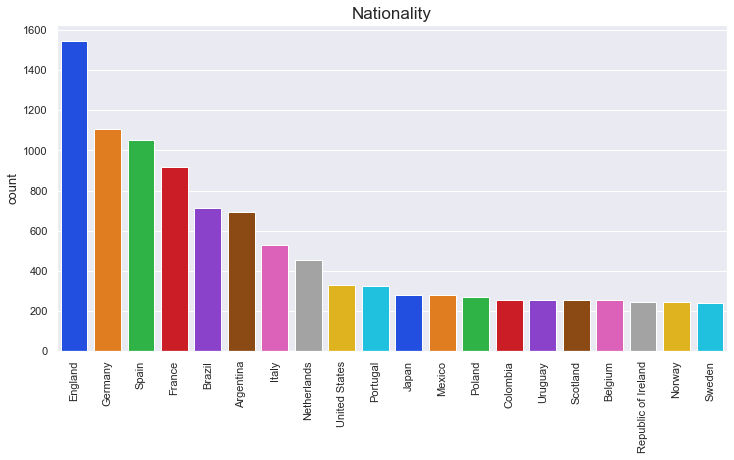

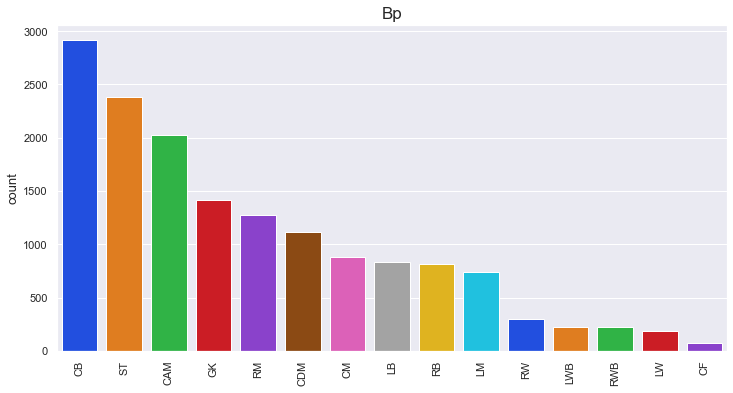

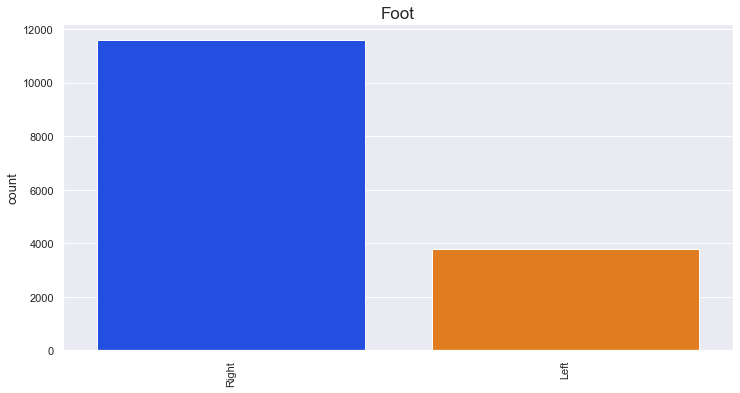

In [60]:
# Look at some variable distribution
count_cols = ['nationality', 'bp', 'foot']
sns.set(rc={'figure.figsize':(12,6)})

def get_topx(df, col, n=20):
    """Extract top n value counts for categorical columns"""
    top10 = df[col].value_counts()[:n]

    return df[col].loc[df[col].isin(top10.index)]

for col in count_cols:
    plt.subplots()
    c = sns.countplot(get_topx(df, col), palette='bright', 
            order=get_topx(df, col).value_counts().index)
    c.set_xlabel(None)
    c.set_title(col[0].upper()+col[1:], fontsize=17)
    c.set_ylabel('count', fontsize=13)
    plt.xticks(rotation=90)


#### Comments
The percentage of lefties in players is around 30%. Much more than a world average of around 10-11%. Probably left-handed players are a valuable asset for teams.

#### Distribution plots of several player data

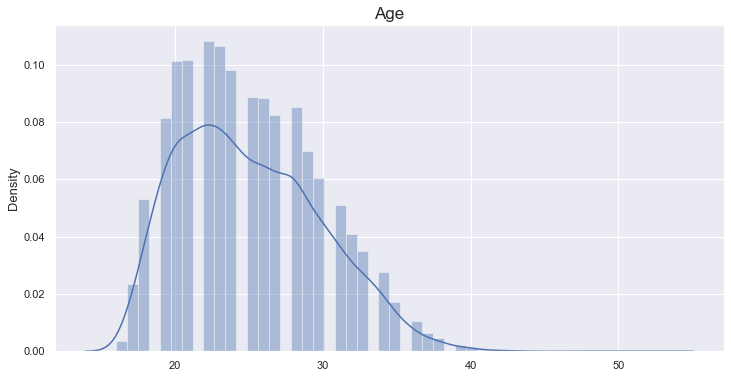

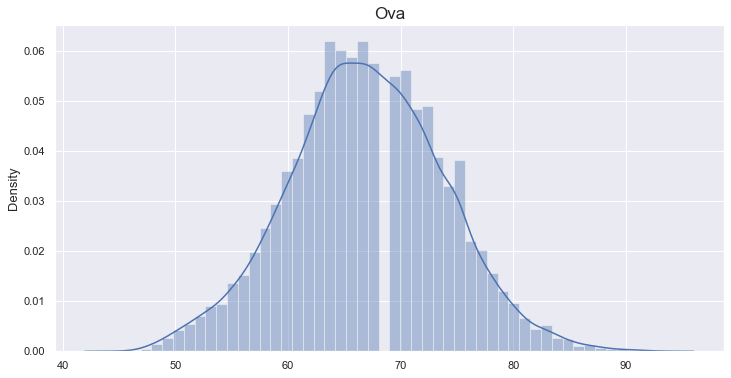

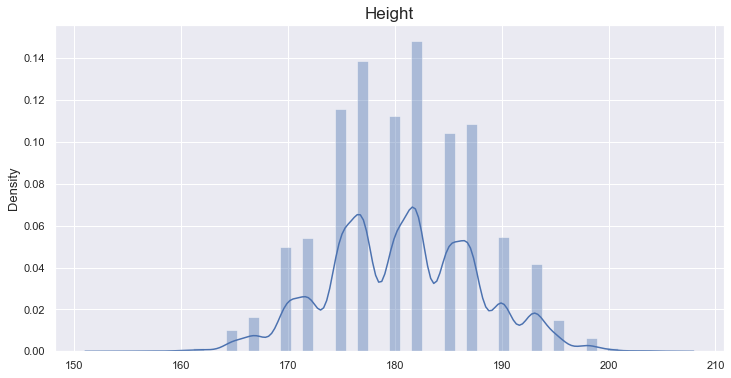

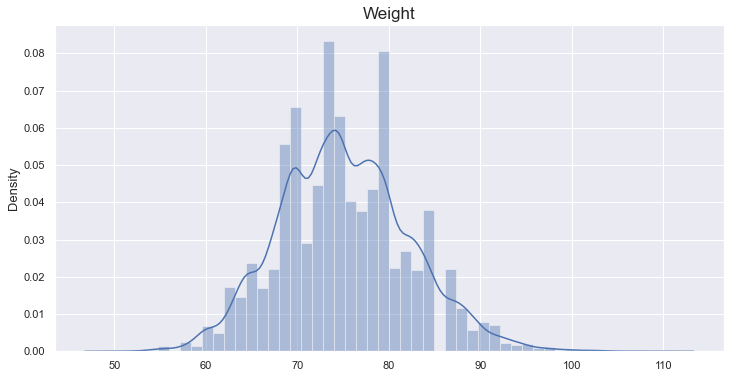

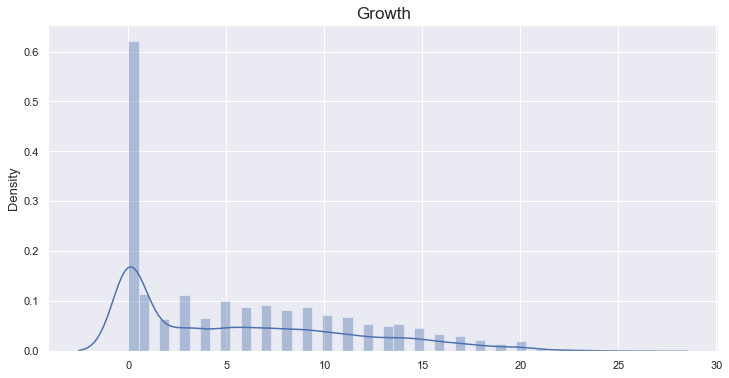

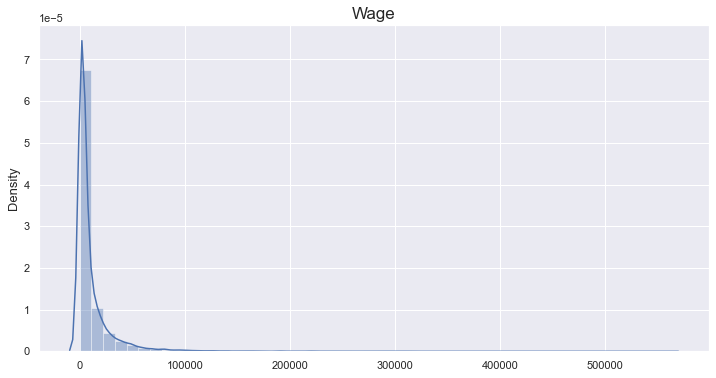

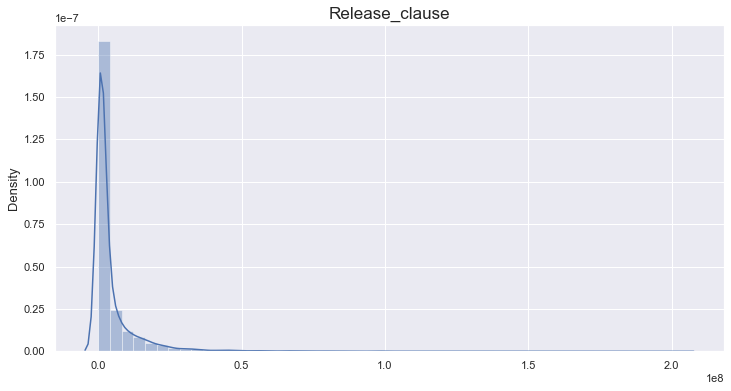

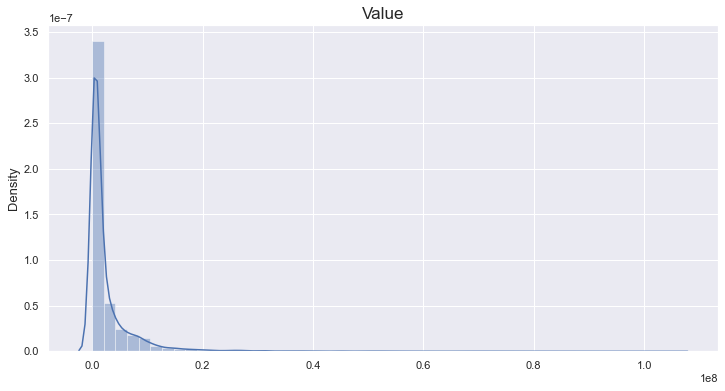

In [61]:
# distribution plots
dist_cols = ['age', 'ova', 'height', 'weight', 'growth', 'wage', 'release_clause', 'value']
for col in dist_cols:
    plt.subplots()
    c = sns.distplot(df[col], bins=50)
    c.set_xlabel(None)
    c.set_title(col[0].upper()+col[1:], fontsize=17)
    c.set_ylabel('Density', fontsize=13)

    plt.show()


Comments:
* The 'age' is slighty skewed to the left
* The enonomic indicators 'wage', 'release_clause' and 'value' are strongly skewed to the left
* The 'Ova', 'Weight' and 'Height' are normalli distributed



### Predict the overall rating (OVA) of player

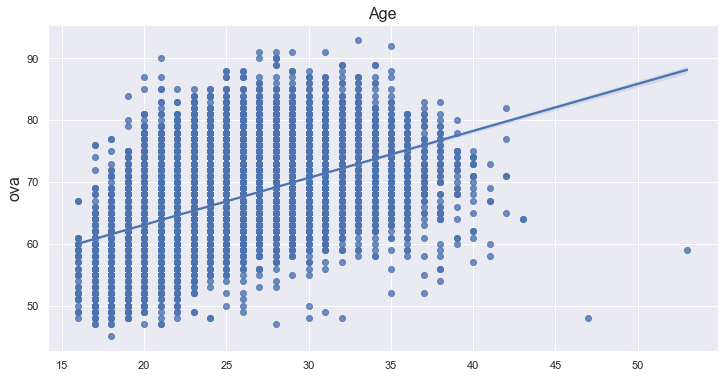

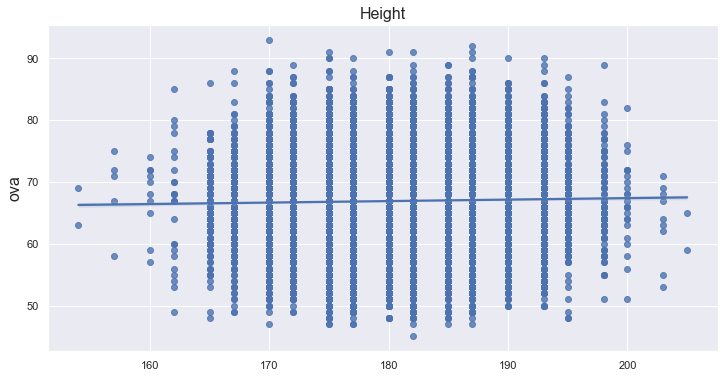

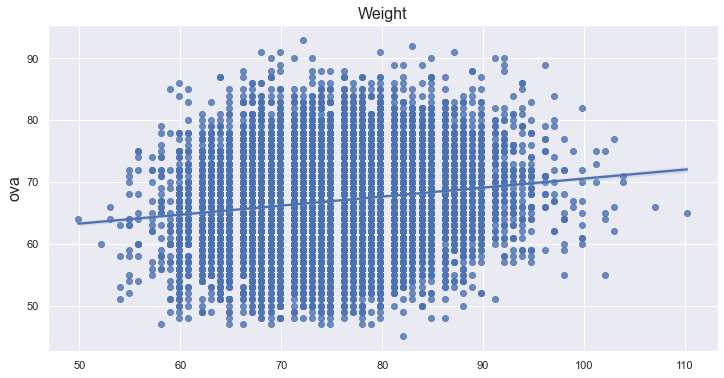

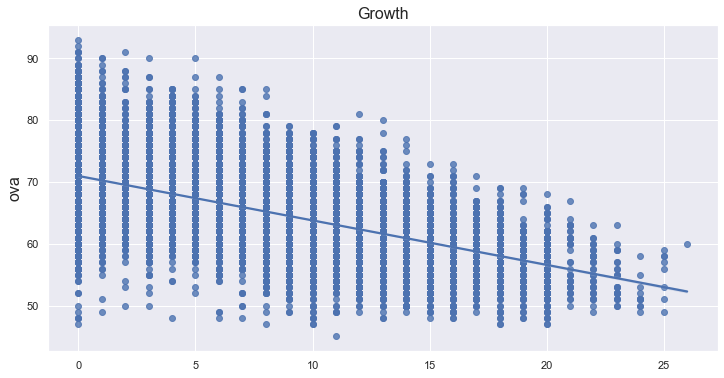

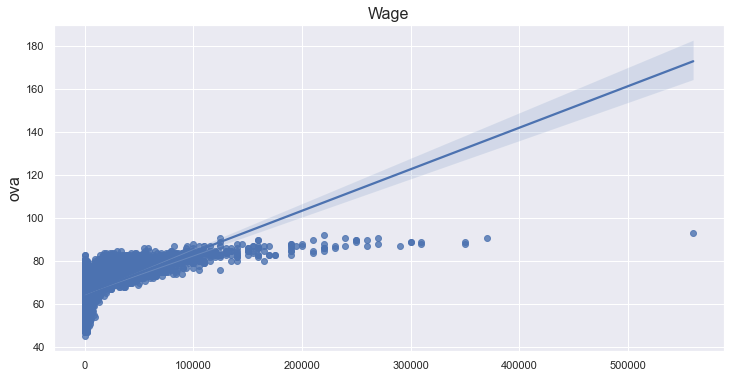

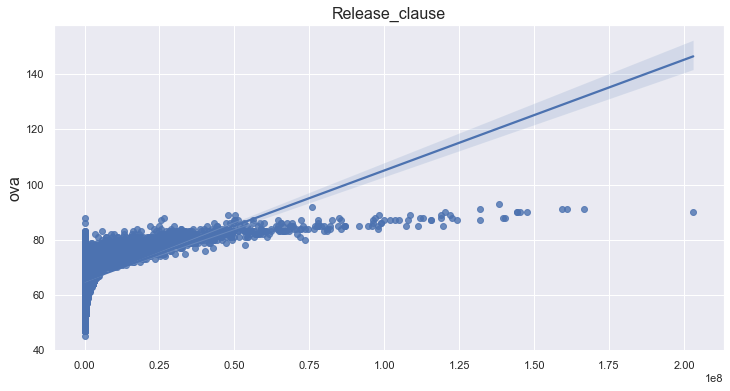

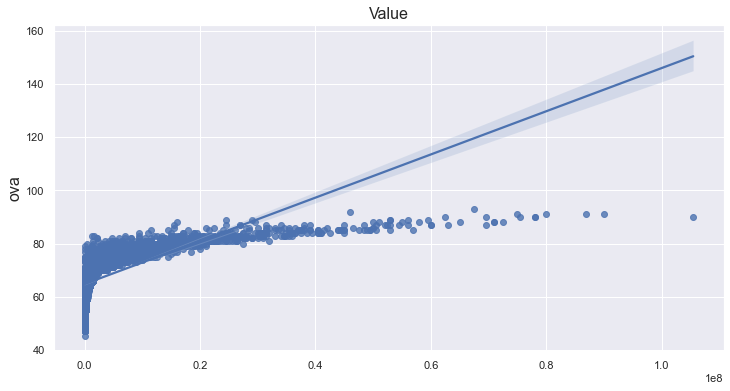

In [62]:
# scatter plots, relations with target OVA
scat_cols = ['age', 'height', 'weight', 'growth', 'wage', 'release_clause', 'value']
for col in scat_cols:
    plt.subplots()
    c = sns.regplot(df[col], df['ova'])
    c.set_xlabel(None)
    c.set_title(col[0].upper()+col[1:], fontsize=16)
    c.set_ylabel('ova', fontsize=16)

    plt.show()

### Linear Regression Model

In [74]:
# functions for implementation of linear regression methods
def show_corr_heatmap(df, figsize, export_path='figs/corr_heatmap.png'):
    """Export half correlation matrix for the dataset in a .png figure 
    TODO: print couples with highest correlation"""
    mask = np.zeros_like(df.corr()) # Matrix full of zeros with shape of df.corr()
    mask[np.triu_indices_from(mask)] = True # upper tridiagonal mask
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(df.corr(), mask=mask, annot=True)
    if not os.path.isdir(export_path.split('/')[0]):
        os.makedirs(export_path.split('/')[0])
    plt.savefig(export_path, dpi=600)
        

def remove_outliers(df, skip_columns, threshold=1.5):
    for col in df.select_dtypes(np.number).columns:
        if col not in skip_columns:
            upper = np.percentile(df[col], 75)  
            lower = np.percentile(df[col], 25)  
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[col]>lower_limit) & (df[col]<upper_limit)]
            assert not df.empty, 'Threshold too high for col: ' + col
    
    return df

def split_data(df, target, test_size, random_state):
    """Separes the features from target and """
    X = df.drop([target], axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def scale_data(X_train, X_test, scaler_class):
    """Fit chosen sclaer class on training data and transforms bot training and test data"""
    scaler = scaler_class.fit(X_train.select_dtypes(np.number))
    X_train_scaled = scaler.transform(X_train.select_dtypes(np.number))
    X_train[X_train.select_dtypes(np.number).columns] = X_train_scaled
    X_test_scaled = scaler.transform(X_test.select_dtypes(np.number))
    X_test[X_test.select_dtypes(np.number).columns] = X_test_scaled
    
def encode_data(X_train, X_test, encoders, cols_to_encode):
    """Apply a encoder class to categorical data"""
    for encoder, cols in zip(encoders, cols_to_encode): # loop on chosen encoders and columns
        if (isinstance(encoder, OrdinalEncoder)) and bool(list(cols)):
            for col in cols:
                encoder_model = encoder.fit(X_train[col].values.reshape(-1,1))
                X_train[col] = encoder_model.transform(X_train[col].values.reshape(-1,1))
                X_test[col] = encoder_model.transform(X_test[col].values.reshape(-1, 1))
        elif isinstance(encoder, OneHotEncoder) and bool(list(cols)):
            encoder_model = encoder.fit(X_train[cols])
            X_train_onehot_encoded = pd.DataFrame(encoder_model.transform(X_train[cols]).toarray())
            X_train_onehot_encoded = X_train_onehot_encoded.set_index(X_train.index) 
            X_train = X_train.drop(X_train[cols], axis=1).join(X_train_onehot_encoded)
            X_test_onehot_encoded = pd.DataFrame(encoder_model.transform(X_test[cols]).toarray())
            X_test_onehot_encoded = X_test_onehot_encoded.set_index(X_test.index) 
            X_test = X_test.drop(X_test[cols], axis=1).join(X_test_onehot_encoded)
        elif bool(list(cols)):
            # Columns are present but no encoder was recognized
            sys.exit("Encoder not recognized, please use another")

    return X_train, X_test

def apply_model(X_train, X_test, y_train, model, return_formula):
    model.fit(X_train, y_train)
    if return_formula:
        print('Coefficients:')
        print(model.coef_, end='\n\n')
        print('Intercept:')
        print(model.intercept_, end='\n\n')
    
    return model.predict(X_test.dropna())

def score_method(df, target, 
                 model,
                 return_formula=False,
                 cols_to_encode=None,
                 scaler=None, encoders=None,
                 cols_to_drop=[],
                 test_size=0.3, random_state=42,
                 outsiders_thresh=None,
                 skip_outsiders_cols = []):
    """
    Scores a Linear Regression Model, it assumes data is already cleaned

    Parameters:
    df (pd.DataFrame): Dataset for our model
    target (str): Name of target column
    outsiders_thresh (float): Threshold for the outliers
    outsiders_cols (list): List of columns in which filter out the outliers
    scaler (class): Scaling method for numerical data
    encoder (list): Encoding methods for categorical data
    cols_to_encode (list): Columns for encoding methods
    model (class): ML model
    

    Returns:
    r2 (float): r2 score of the method
    mae(float): mean absolute error 
    mse(float): mean squared error
    """
    df = df.drop(cols_to_drop, axis=1)
    if outsiders_thresh:
        df = remove_outliers(df,
                            threshold=outsiders_thresh,
                            skip_columns=skip_outsiders_cols + [target])
    X_train, X_test, y_train, y_test = split_data(df, target, test_size, random_state)
    if scaler:
        scale_data(X_train, X_test, scaler)
    if encoders:
        X_train, X_test = encode_data(X_train, X_test, encoders, cols_to_encode)
    predictions = apply_model(X_train, X_test, y_train, model, return_formula)

    return (predictions,
           r2_score(y_test, predictions),
           mean_absolute_error(y_test, predictions),
           mean_squared_error(y_test, predictions, squared=False))

def save_results(path, results, append=True, variable=None):
    """Save results in a file
    Data is in format: r2, mae, mse"""
    if not os.path.isdir(path.split('/')[0]):
        os.makedirs(path.split('/')[0])
    if append:
        f = open(path, 'a')
    else:
        f = open(path, 'w')
    f.write(str(results).replace('(', '').replace(')', ''))
    if variable:
        f.write(' ' + str(variable) + '\n')
    else:
        f.write(' ' + str(variable) + '\n')
    f.close()

### Raw dataset OVA prediction (no multicollinearity is addressed)

In [64]:
# OrdinalEncoder is used for 'nationality' and 'club' due to
# their high number of distinct values 
# No multicollinearity problem is addressed
# Some sort of raw dataset benchmark
pred, r2, mae, mse = score_method(df=df,
                            target='ova', 
                            scaler=StandardScaler(),
                            encoders=[OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                      OneHotEncoder(handle_unknown='ignore')],
                            cols_to_encode=[['nationality', 'club'], 
                                            ['bp', 'foot', 'a/w', 'd/w']],
                            skip_outsiders_cols=['w/f', 'ir'], # all are outsiders
                            outsiders_thresh=4.0,
                            model=LinearRegression())
print('r2 = {}\nmae = {}\nmse = {}'.format(
    round(r2, 4), round(mae,4), round(mse, 4))
)

r2 = 0.9815
mae = 0.5553
mse = 0.782


### OVA prediction with recuced dataset (only player data)

In [65]:
# Predict with only Player_data columns
# It should be the more realistic case
data = df[player_data+['ova']]

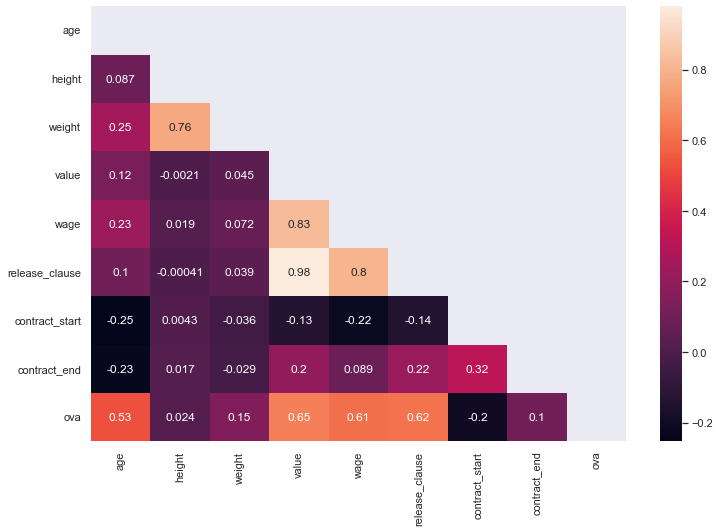

In [66]:
# Multicollinearity
show_corr_heatmap(data, (12,8))

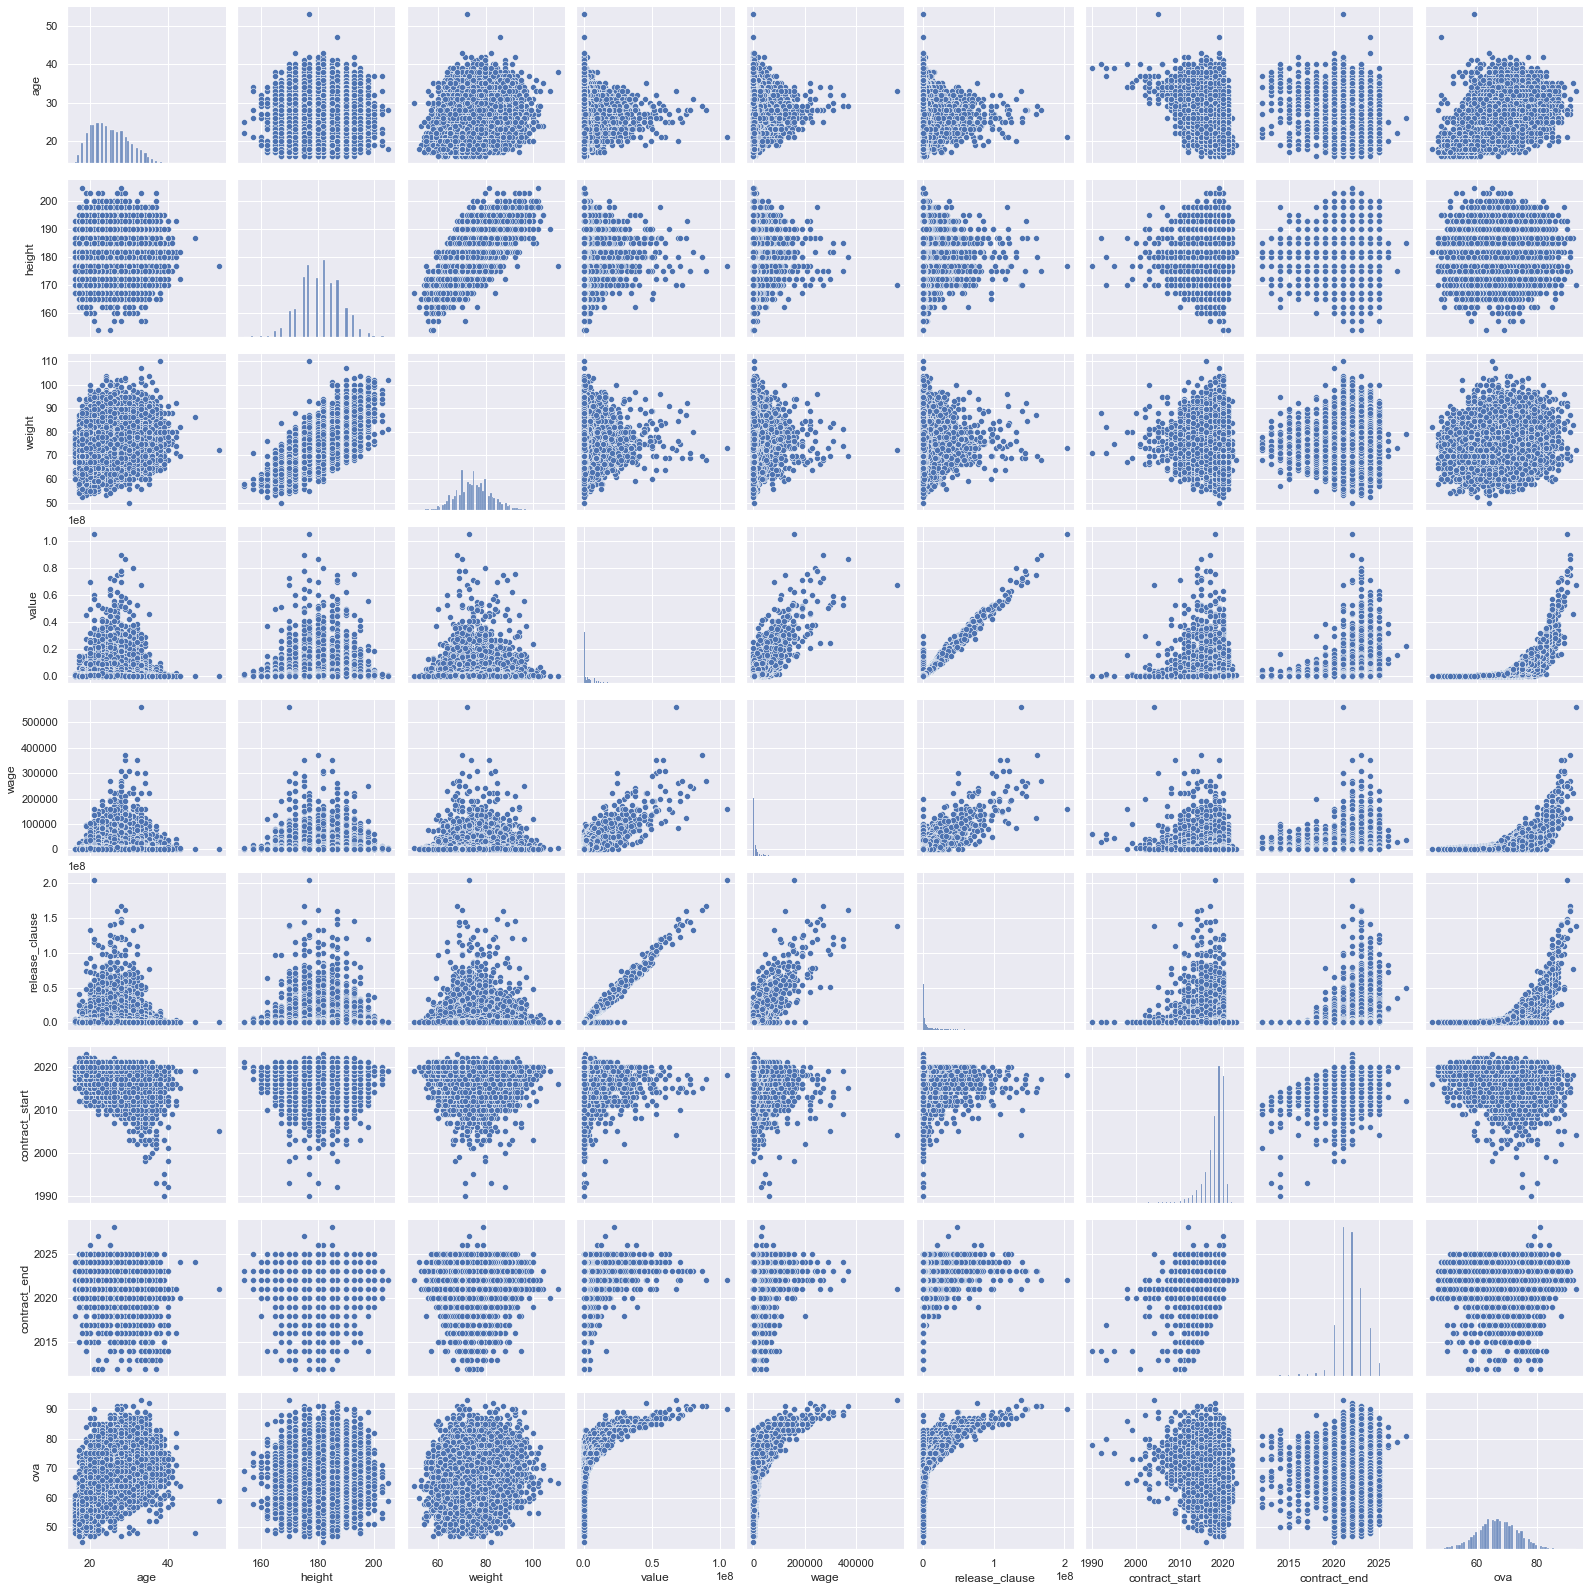

In [67]:
sns.pairplot(data)

#### Comment
We can see that ova has the highest correlation factor with age, value, wage, release_clause.

This can be expected because surely age defines a player's perfomances, together with

economic indicators wage, release_clause and value. Higher values of this indicators

should correctly indicate a better player (you get what you pay for)


In [68]:
# Let's make a first prediction not accounting for multicollinearity
data = df[player_data+['ova']]
display(data.head())
pred, r2, mae, mse = score_method(df=data,
                            target='ova', 
                            scaler=StandardScaler(), 
                            encoders=[OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                      OneHotEncoder(handle_unknown='ignore')],
                            cols_to_encode=[['nationality', 'club'], 
                                            ['bp', 'foot']],
                            outsiders_thresh=1.5,
                            model=LinearRegression())
print('r2 = {}\nmae = {}\nmse = {}'.format(
    round(r2, 4), round(mae,4), round(mse, 4))
)

,age,nationality,club,bp,height,weight,foot,value,wage,release_clause,contract_start,contract_end,ova
0,33,Italy,Udinese,LWB,182,82.100152,Left,625000.0,7000.0,0.0,2008.0,2016.0,69
1,37,Spain,KAS Eupen,CM,177,64.863656,Right,600000.0,7000.0,1100000.0,2014.0,2019.0,71
2,33,England,Coventry City,CAM,175,73.028312,Right,1100000.0,15000.0,0.0,2016.0,2020.0,71
3,36,Spain,Vissel Kobe,CAM,170,68.038800,Right,5500000.0,12000.0,7200000.0,2018.0,2021.0,81
4,27,Germany,Alemannia Aachen,RW,172,73.935496,Right,725000.0,5000.0,0.0,2011.0,2012.0,66


r2 = 0.8041
mae = 1.6554
mse = 2.2233


In [81]:
# from the heatmap we see that the three economic indicators are highly correlated
# let's keep only
# moreover weight and height have a correlation factor of 0.76
# weight is surprisingly correlated more to ova then height
# anyway, dropping the multicollinear feature does not improve the results. 
# probably due to the low number of features
data = df[player_data+['ova']]
data = data.drop(['release_clause', 'wage', 'height', 'value'], axis=1)
display(data.head())
pred, r2, mae, mse = score_method(df=data,
                            target='ova', 
                            scaler=StandardScaler(),
                            encoders=[OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                                      OneHotEncoder(handle_unknown='ignore')],
                            cols_to_encode=[['nationality', 'club'], 
                                            ['bp', 'foot']],
                            outsiders_thresh=1.5,
                            model=LinearRegression())
print('r2 = {}\nmae = {}\nmse = {}'.format(
    round(r2, 4), round(mae,4), round(mse, 4))
)

,age,nationality,club,bp,weight,foot,contract_start,contract_end,ova
0,33,Italy,Udinese,LWB,82.100152,Left,2008.0,2016.0,69
1,37,Spain,KAS Eupen,CM,64.863656,Right,2014.0,2019.0,71
2,33,England,Coventry City,CAM,73.028312,Right,2016.0,2020.0,71
3,36,Spain,Vissel Kobe,CAM,68.038800,Right,2018.0,2021.0,81
4,27,Germany,Alemannia Aachen,RW,73.935496,Right,2011.0,2012.0,66


r2 = 0.396
mae = 4.0555
mse = 5.2068


### OVA calculation from player stats

In [80]:

data = df[list(player_stats)+['ova']]
display(data.head())
pred, r2, mae, mse = score_method(df=data,
                            target='ova', 
                            scaler=StandardScaler(),
                            encoders = [OneHotEncoder(handle_unknown='ignore')],
                            cols_to_encode=[['a/w', 'd/w']], 
                            model=LinearRegression(),
                            return_formula=True)
print('r2 = {}\nmae = {}\nmse = {}'.format(
    round(r2, 4), round(mae,4), round(mse, 4)))

,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls_min,ls_max,st_min,st_max,rs_min,rs_max,lw_min,lw_max,lf_min,lf_max,cf_min,cf_max,rf_min,rf_max,rw_min,rw_max,lam_min,lam_max,cam_min,cam_max,ram_min,ram_max,lm_min,lm_max,lcm_min,lcm_max,cm_min,cm_max,rcm_min,rcm_max,rm_min,rm_max,lwb_min,lwb_max,ldm_min,ldm_max,cdm_min,cdm_max,rdm_min,rdm_max,rwb_min,rwb_max,lb_min,lb_max,lcb_min,lcb_max,cb_min,cb_max,rcb_min,rcb_max,rb_min,rb_max,gk_min,gk_max,ova
0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.951409,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4.0,65,65,65,65,65,65,68,68,67,67,67,67,67,67,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,69,69,69,69,73,69,71,69,71,69,71,69,73,69,71,69,69,69,69,69,69,69,71,17,17,69
1,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4.0,67,68,67,68,67,68,67,67,68,68,68,68,68,68,67,67,70,71,70,71,70,71,68,69,70,71,70,71,70,71,68,69,62,63,66,67,66,67,66,67,62,63,60,61,60,61,60,61,60,61,60,61,17,18,71
2,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.951409,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11.0,64,64,64,64,64,64,70,70,69,69,69,69,69,69,70,70,71,71,71,71,71,71,68,68,66,66,66,66,66,66,68,68,52,52,54,54,54,54,54,54,52,52,47,47,46,46,46,46,46,46,47,47,15,15,71
3,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149.0,72,75,72,75,72,75,79,79,79,79,79,79,79,79,79,79,81,83,81,83,81,83,79,81,81,81,81,81,81,81,79,81,70,73,73,76,73,76,73,76,70,73,67,70,64,67,64,67,64,67,67,70,17,20,81
4,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.951409,79,22,26,31.0,46,8,13,7,9,9,1649,360,2,3,Medium,Medium,2,91,56,56,67,27,63,7.0,62,62,62,62,62,62,66,66,62,62,62,62,62,62,66,66,62,62,62,62,62,62,64,64,54,54,54,54,54,54,64,64,50,50,47,47,47,47,47,47,50,50,46,46,41,41,41,41,41,41,46,46,13,13,66


Coefficients:
[-8.70570163e-02 -6.00650377e-01 -1.83457439e-01  4.72764224e-01
  8.13689304e-02 -6.05135488e-02 -2.17984488e-01 -1.26396083e+00
 -4.27803105e-02  7.12592660e-02 -4.41089894e-01  7.66888002e-01
 -1.21709559e-01 -3.15546372e-01 -8.14040154e-01 -2.87860559e-01
  1.72133011e+00 -1.30595595e-01 -5.20290157e-01  8.41243636e-02
  1.85645193e-02 -9.30954220e-01 -5.34582079e-01 -3.16325868e-01
 -9.50856987e-01 -4.60964541e-01 -2.14268346e+00 -5.10657742e-01
 -2.13336028e-01  3.64420720e-01  8.65463990e-01 -1.34055384e+00
 -6.47102464e-01 -1.55426979e+00 -1.70393105e+00 -1.32962551e-01
 -7.85030520e-03 -1.33940874e-01 -1.64557463e-01 -6.50073344e-02
 -2.81867573e-01 -8.00344928e-01  1.11715047e+00  9.68415667e-03
  5.82329345e-01  4.45186645e-01  6.23729063e-01  4.44773179e-01
  5.66780276e-01  1.83473888e+00 -2.19761634e-01  1.23158617e+00
  1.73040101e-01 -5.45043465e-01  1.25570103e+00 -5.45043465e-01
  1.25570103e+00 -5.45043465e-01  1.25570103e+00  6.33485686e-01
 -1.0416508